In [130]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import get_test_data

import pandas as pd
import seaborn as sns 
import time

%run functions.ipynb

e.g.1 $f(x) = (x-2)^2$

In [118]:
n = 50
iter = 100
eta = 1/2
theta_init = [4]

# BGD
start_gd = time.time()
theta_gd, f_x_gd = gradient_descent(theta_init, eta, 0.01) 
end_gd = time.time()
elapsed_time_gd = np.round(end_gd-start_gd, 2)

# SGD
start_sgd = time.time()
theta_sgd, f_x_sgd = sgd(theta_init, n)
end_sgd = time.time()
elapsed_time_sgd = np.round(end_sgd-start_sgd, 2)

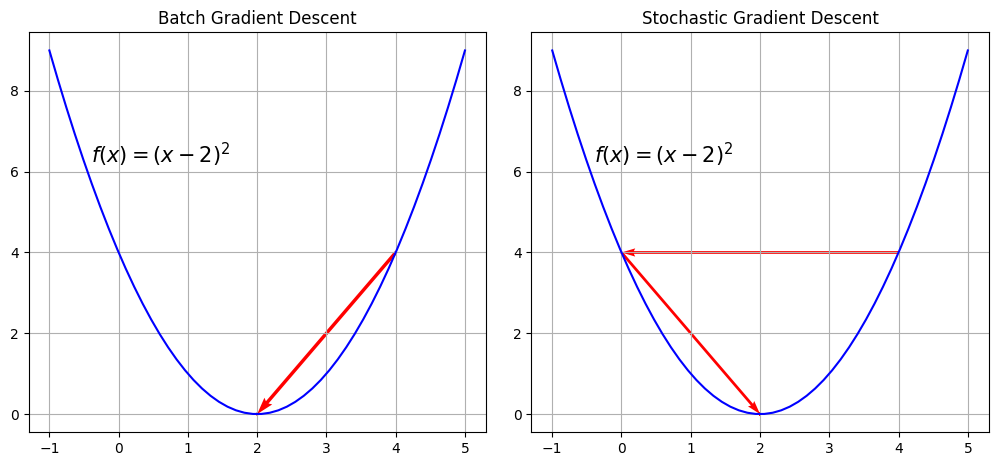

In [119]:
plt.figure(figsize=(12,5))

# Figure 1
plt.subplot(1,2,1)
x = np.linspace(-1, 5, num=50)
plt.plot(x, (x-2)**2, c='b')
plt.text(-0.4, 6.2, '$f(x) = (x-2)^2$', fontsize=15)

plt.quiver(theta_gd[:-1], f_x_gd[:-1], theta_gd[1:]-theta_gd[:-1], f_x_gd[1:]-f_x_gd[:-1], scale_units='xy', angles='xy', color='r', scale=1)
plt.grid()
plt.title('Batch Gradient Descent')

# Figure 2
plt.subplot(1,2,2)
x = np.linspace(-1, 5, num=50)
plt.plot(x, (x-2)**2, c='b')
plt.text(-0.4, 6.2, '$f(x) = (x-2)^2$', fontsize=15)

plt.quiver(theta_sgd[:-1], f_x_sgd[:-1], theta_sgd[1:]-theta_sgd[:-1], f_x_sgd[1:]-f_x_sgd[:-1], scale_units='xy', angles='xy', color='r', scale=1)
plt.grid()
plt.title('Stochastic Gradient Descent')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.3)
plt.show()

e.g.2 $f(x,y) = x^2 + y^2$

In [134]:
theta_init = [-4,5] 
#theta_init = [3,2]
iter = 200
n = 10/0.02

# BGD
start_gd = time.time()
theta_gd, f_xy_gd = gradient_descent(theta_init, 0.01, 0.01)
end_gd = time.time()
elapsed_time_gd = np.round(end_gd-start_gd, 2)

# SGD
start_sgd = time.time()
theta_sgd, f_xy_sgd = sgd(theta_init, n)
end_sgd = time.time()
elapsed_time_sgd = np.round(end_sgd-start_sgd, 2)

d:\Temp\ipykernel_18976\4102296848.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


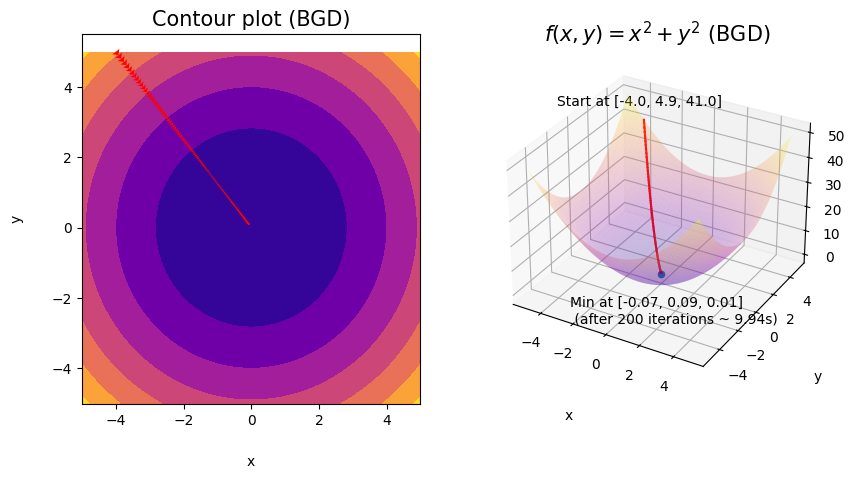

In [135]:
fig = plt.figure(figsize=plt.figaspect(0.5)) # Set up a figure twice as wide as it is tall

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(x, y)

# Figure 1

ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(X, Y, X**2+Y**2, cmap = plt.cm.plasma)
ax1.set_title('Contour plot (BGD)',fontsize=15)
ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)

plt.quiver(np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[1,:], 
           np.delete(theta_gd, [0], axis=1)[0,:]-np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_gd, [0], axis=1)[1,:]-np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[1,:],  
           scale_units='xy', angles='xy', color='r', scale=1, headwidth=10)

# Figure 2

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, X**2+Y**2, cmap=plt.cm.plasma, alpha=0.25)
ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('z', labelpad=20)
ax2.set_title('$f(x, y) = x^2 + y^2$ (BGD)', fontsize=15)

ax2.quiver(np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[1,:],
           f_xy_gd[:-1],
           np.delete(theta_gd, [0], axis=1)[0,:]-np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_gd, [0], axis=1)[1,:]-np.delete(theta_gd, theta_gd.shape[1]-1, axis=1)[1,:],  
           f_xy_gd[1:]-f_xy_gd[:-1],
           color='r')

ax2.scatter(theta_gd[0, theta_gd.shape[1]-1], theta_gd[1, theta_gd.shape[1]-1], f_xy_gd[theta_gd.shape[1]-1])
ax2.text(-1.7, -6.5, 0.5, "Min at [{}, {}, {}] \n (after {} iterations ~ {}s)".format(np.round(theta_gd[0, theta_gd.shape[1]-1],2), 
                                                                                     np.round(theta_gd[1, theta_gd.shape[1]-1],2), 
                                                                                     np.round(f_xy_gd[theta_gd.shape[1]-1],2), 
                                                                                     iter, 
                                                                                     elapsed_time_gd), color='black')
ax2.text(theta_init[0]-5, theta_init[1]-1, feval('x**2+y**2', theta_init[0], theta_init[1]), "Start at [{}, {}, {}]".format(theta_gd[0, 0], theta_gd[1, 1], f_xy_gd[0],2), color='black')

fig.show()

d:\Temp\ipykernel_18976\2811810567.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


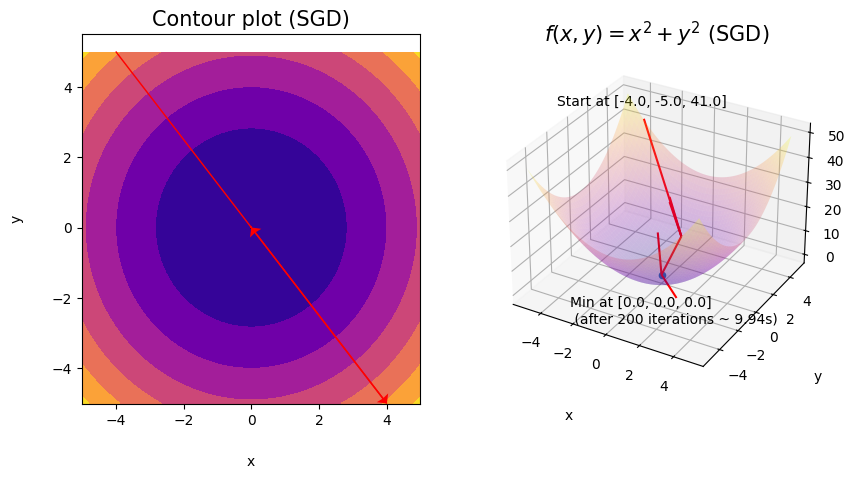

In [137]:
fig = plt.figure(figsize=plt.figaspect(0.5)) # Set up a figure twice as wide as it is tall

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(x, y)

# Figure 3

ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(X, Y, X**2+Y**2, cmap = plt.cm.plasma)
ax1.set_title('Contour plot (SGD)',fontsize=15)
ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)

plt.quiver(np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[1,:], 
           np.delete(theta_sgd, [0], axis=1)[0,:]-np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_sgd, [0], axis=1)[1,:]-np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[1,:],  
           scale_units='xy', angles='xy', color='r', scale=1, headwidth=10)

# Figure 4

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, X**2+Y**2, cmap=plt.cm.plasma, alpha=0.25)
ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('z', labelpad=20)
ax2.set_title('$f(x, y) = x^2 + y^2$ (SGD)', fontsize=15)

ax2.quiver(np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[1,:],
           f_xy_sgd[:-1],
           np.delete(theta_sgd, [0], axis=1)[0,:]-np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[0,:], 
           np.delete(theta_sgd, [0], axis=1)[1,:]-np.delete(theta_sgd, theta_sgd.shape[1]-1, axis=1)[1,:],  
           f_xy_sgd[1:]-f_xy_sgd[:-1],
           color='r')

ax2.scatter(theta_sgd[0, theta_sgd.shape[1]-1], theta_sgd[1, theta_sgd.shape[1]-1], f_xy_sgd[theta_sgd.shape[1]-1])
ax2.text(-1.7, -6.5, 0.5, "Min at [{}, {}, {}] \n (after {} iterations ~ {}s)".format(np.round(theta_sgd[0, theta_sgd.shape[1]-1],2), 
                                                                                      np.round(theta_sgd[1, theta_sgd.shape[1]-1],2), 
                                                                                      np.round(f_xy_sgd[theta_sgd.shape[1]-1],2), 
                                                                                     iter, 
                                                                                     elapsed_time_gd), color='black')
ax2.text(theta_init[0]-5, theta_init[1]-1, feval('x**2+y**2', theta_init[0], theta_init[1]), "Start at [{}, {}, {}]".format(theta_sgd[0, 0], theta_sgd[1, 1], f_xy_sgd[0],2), color='black')

fig.show()

e.g.3 $f(x, y) = \frac{10x_1^2 + x_2^2}{2}$

In [65]:
theta_init = [3,2]
iter = 100

start = time.time()
theta, f_xy = gradient_descent(theta_init, 0.01, 0.01)
end = time.time()
elapsed_time = np.round(end-start, 2)

d:\Temp\ipykernel_18976\3366106668.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


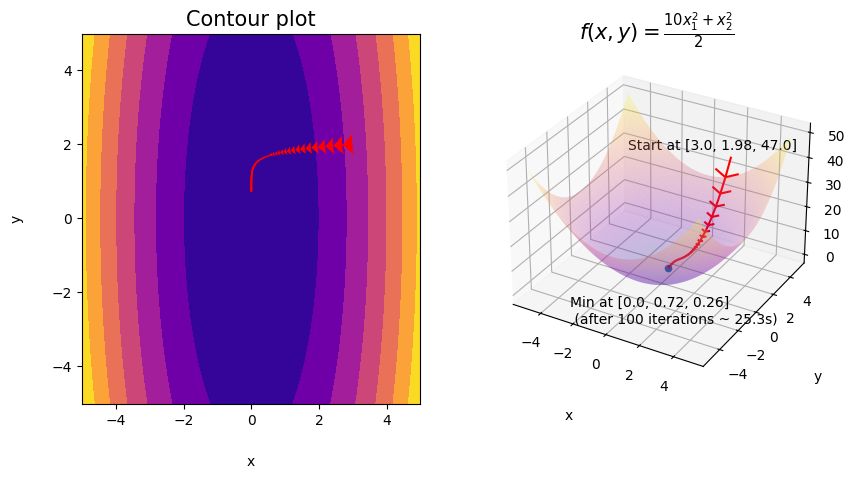

In [66]:
fig = plt.figure(figsize=plt.figaspect(0.5)) # Set up a figure twice as wide as it is tall

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(x, y)

# Figure 1

ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(X, Y, 5*X**2+0.5*Y**2, cmap = plt.cm.plasma)
ax1.set_title('Contour plot',fontsize=15)
ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)

plt.quiver(np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, theta.shape[1]-1, axis=1)[1,:], 
           np.delete(theta, [0], axis=1)[0,:]-np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, [0], axis=1)[1,:]-np.delete(theta, theta.shape[1]-1, axis=1)[1,:],  
           scale_units='xy', angles='xy', color='r', scale=1, headwidth=10)

# Figure 2

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, X**2+Y**2, cmap=plt.cm.plasma, alpha=0.25)
ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('z', labelpad=20)
ax2.set_title('$f(x, y) = \\frac{10x_1^2 + x_2^2}{2}$', fontsize=15)

ax2.quiver(np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, theta.shape[1]-1, axis=1)[1,:],
           f_xy[:-1],
           np.delete(theta, [0], axis=1)[0,:]-np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, [0], axis=1)[1,:]-np.delete(theta, theta.shape[1]-1, axis=1)[1,:],  
           f_xy[1:]-f_xy[:-1],
           color='r')

ax2.scatter(theta[0, theta.shape[1]-1], theta[1, theta.shape[1]-1], f_xy[theta.shape[1]-1])
ax2.text(-1.7, -6.5, 0.5, "Min at [{}, {}, {}] \n (after {} iterations ~ {}s)".format(np.round(theta[0, theta.shape[1]-1],2), 
                                                                                     np.round(theta[1, theta.shape[1]-1],2), 
                                                                                     np.round(f_xy[theta.shape[1]-1],2), 
                                                                                     iter, 
                                                                                     elapsed_time), color='black')
ax2.text(theta_init[0]-5, theta_init[1]-2, feval('5*x**2 + 0.5*y**2', theta_init[0], theta_init[1]), "Start at [{}, {}, {}]".format(theta[0, 0], theta[1, 1], f_xy[0],2), color='black')

fig.show()